# The Lorenz Differential Equations

Before we start, we import some preliminary libraries. We will also import (below) the accompanying `lorenz.py` file, which contains the actual solver and plotting routine.

In [1]:
import csv
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
from csv import DictReader
from collections import defaultdict

**Za dobit imena stolpcev in določanje katere hočem(stolpci2)**

In [2]:
with open('../Data/prebivalstvo-SLO.csv', 'rt', encoding='utf-8') as f:
    d_reader = csv.DictReader(f)
    headers = d_reader.fieldnames

In [3]:
stolpci = []
for a in headers:
    if "Total increase" in a:
        stolpci.append(a)

In [4]:
stolpci2 = []
stolpci3 = []
for a in stolpci:
    if "Total increase per "not in a:
        leto = a.split()
        if float(leto[0]) >2007: 
            stolpci2.append(a)
    else:
        leto = a.split()
        if float(leto[0]) >2007: 
            stolpci3.append(a)

In [5]:
stolpci2

['2008 Total increase',
 '2009 Total increase',
 '2010 Total increase',
 '2011 Total increase',
 '2012 Total increase',
 '2013 Total increase',
 '2014 Total increase',
 '2015 Total increase',
 '2016 Total increase',
 '2017 Total increase',
 '2018 Total increase']

**Risanje drevesa(podatki so letni priraski(direktne številjke ljudi), od leta 1995 do 2018)**

In [6]:
vsi=[]
vsi2=[]
li=[]
li2=[]
obcine=[]
slovar ={}
reader = DictReader(open('../Data/prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    li=[]
    li2=[]
    obcina=row["MUNICIPALITIES"]
    obcine.append(obcina)
    if obcina!="SLOVENIA":
        for a in stolpci2:
            if (row[a]=="-"):
                li.append(0)
            else:
                li.append(row[a])
        vsi.append(li)
        
        for a in stolpci3:
            if (row[a]=="-"):
                li2.append(0)
            else:
                li2.append(row[a])
        vsi2.append(li2)
    


In [7]:
Ll = sch.linkage(vsi, method="average", metric="jaccard")
Lll = sch.linkage(vsi, method="average", metric="euclidean")

In [8]:
Ll2 = sch.linkage(vsi2, method="average", metric="jaccard")
Lll2 = sch.linkage(vsi2, method="average", metric="euclidean")

**Drevo z direktnimi podatki rastii/upada (ni na 1000 prebivalstva), prevaga Ljubljana, ker pač več ljudi 
(leta 2008 do 2018, daj isto kot naslednji)**

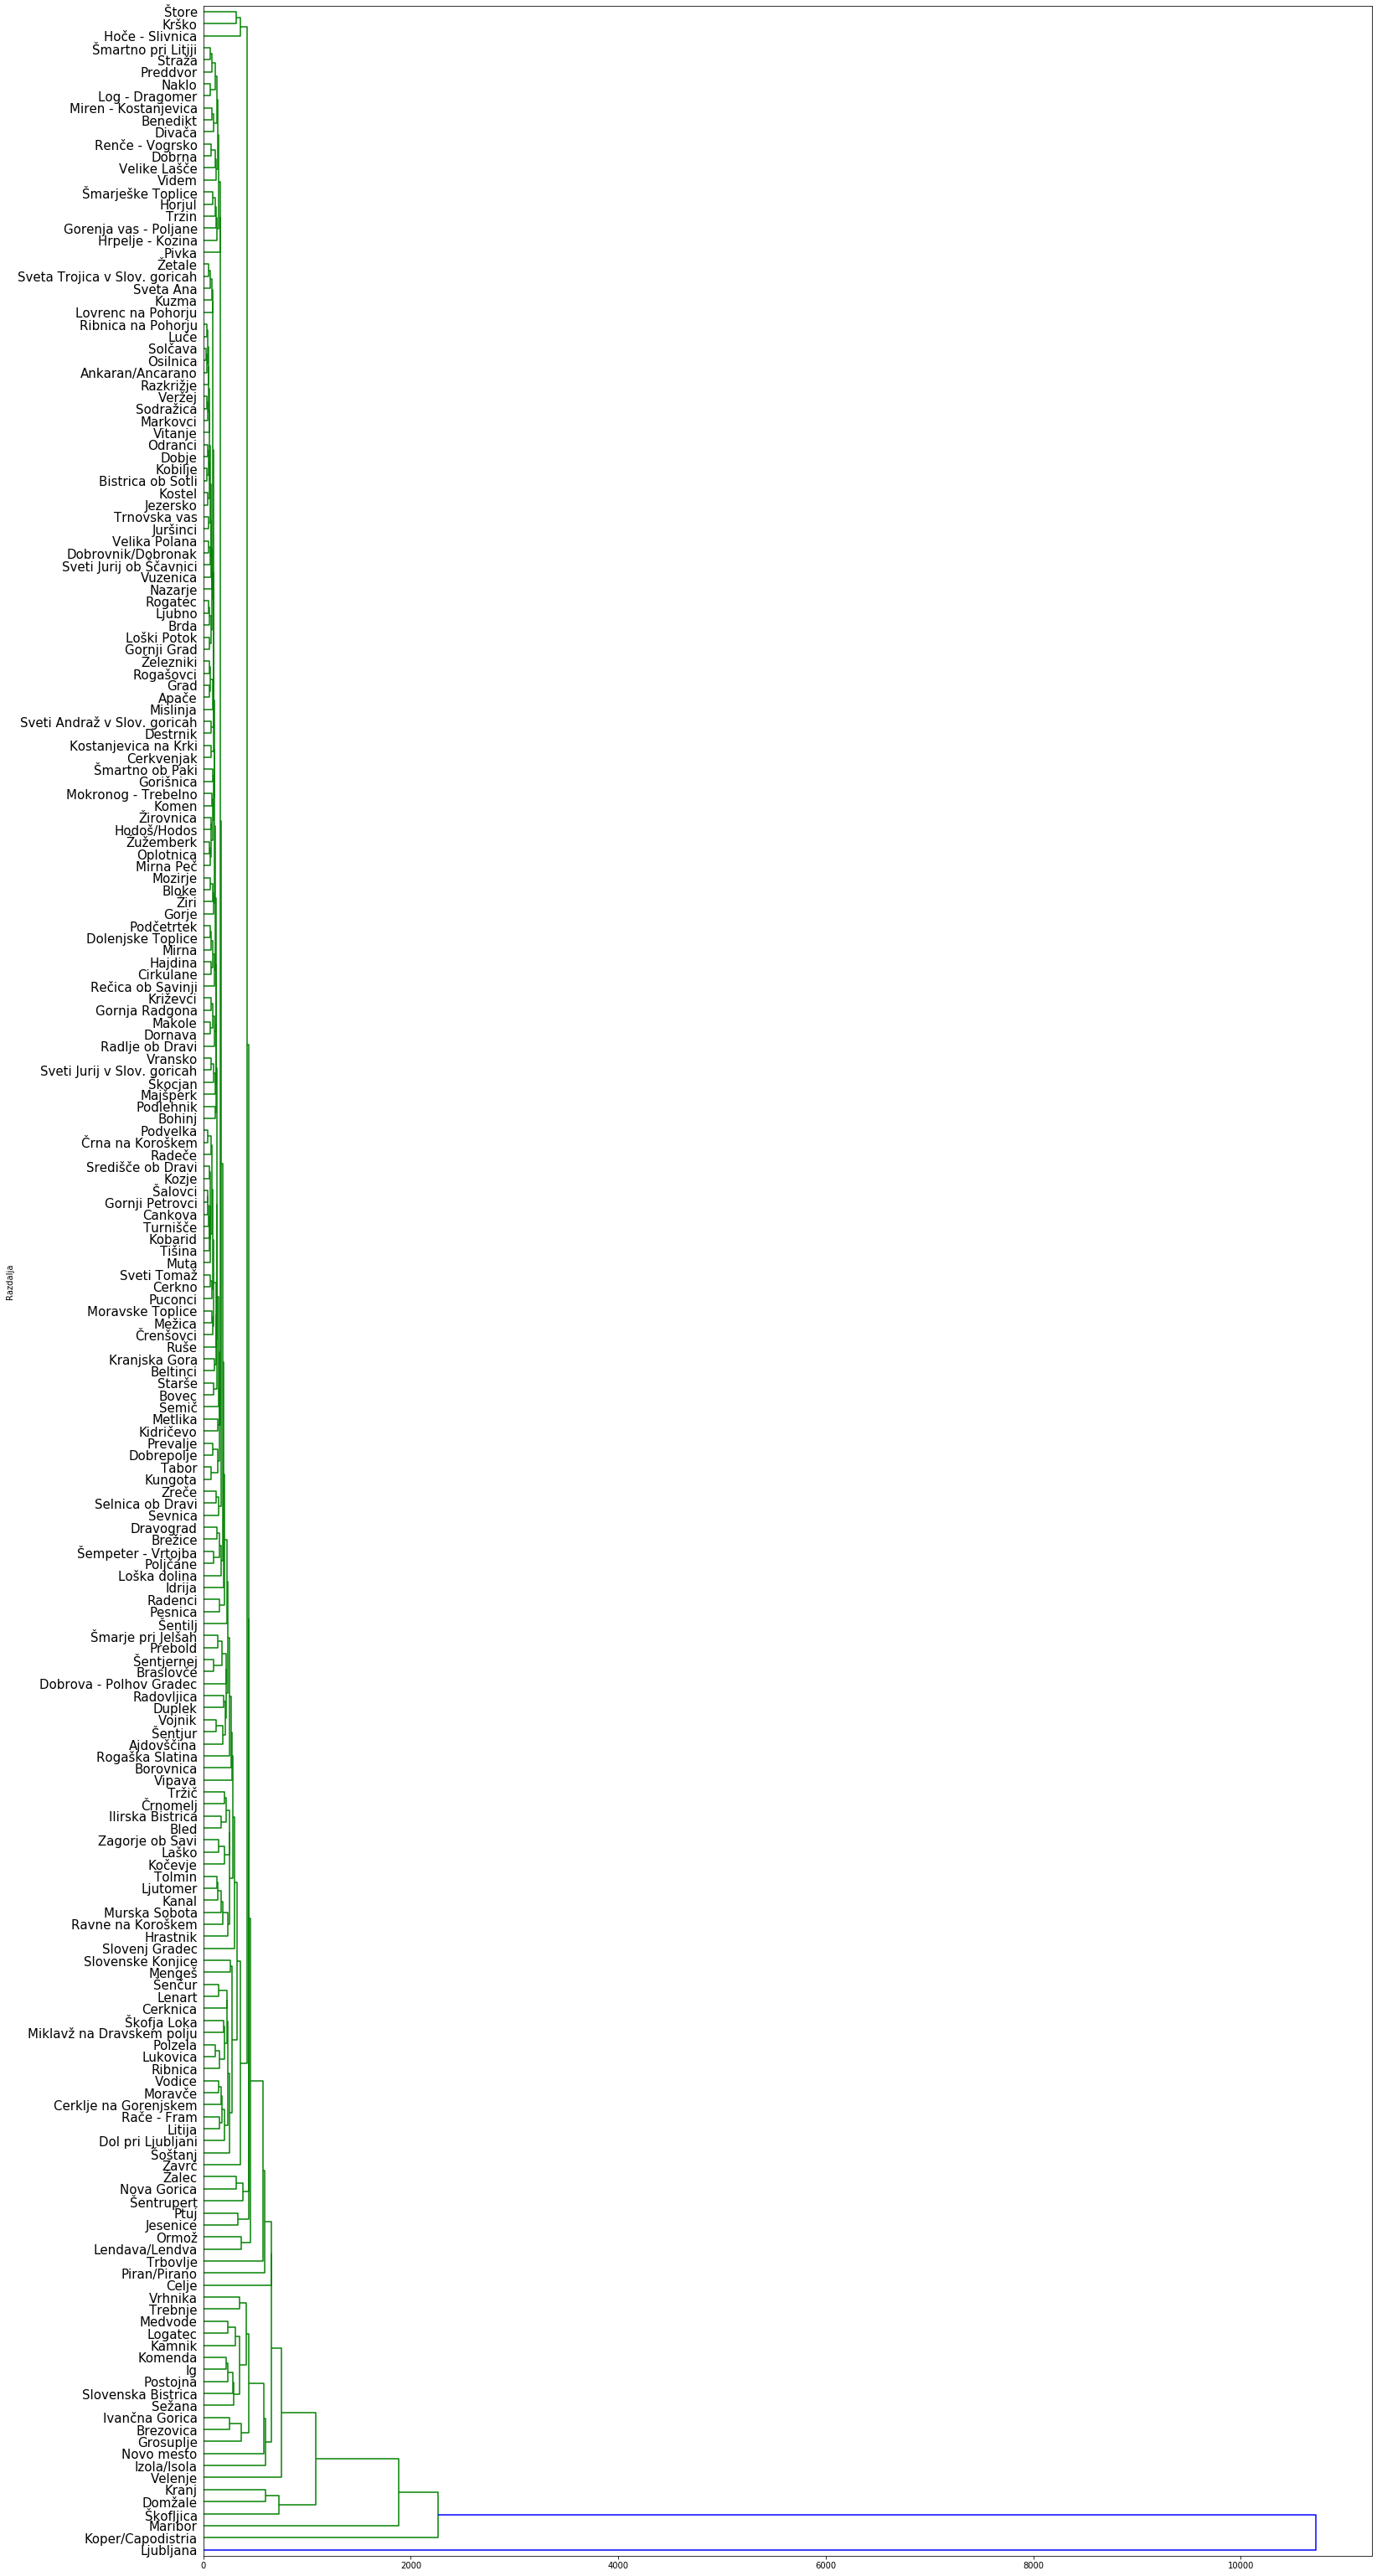

In [9]:
plt.figure(figsize=(25, 56))
D  = sch.dendrogram(Lll,labels=obcine,orientation="right", leaf_font_size=15)

plt.ylabel("Razdalja")
plt.show()

**Prikaz rasti na 1000 prebivalstva (samo leta 2008 do 2018)**

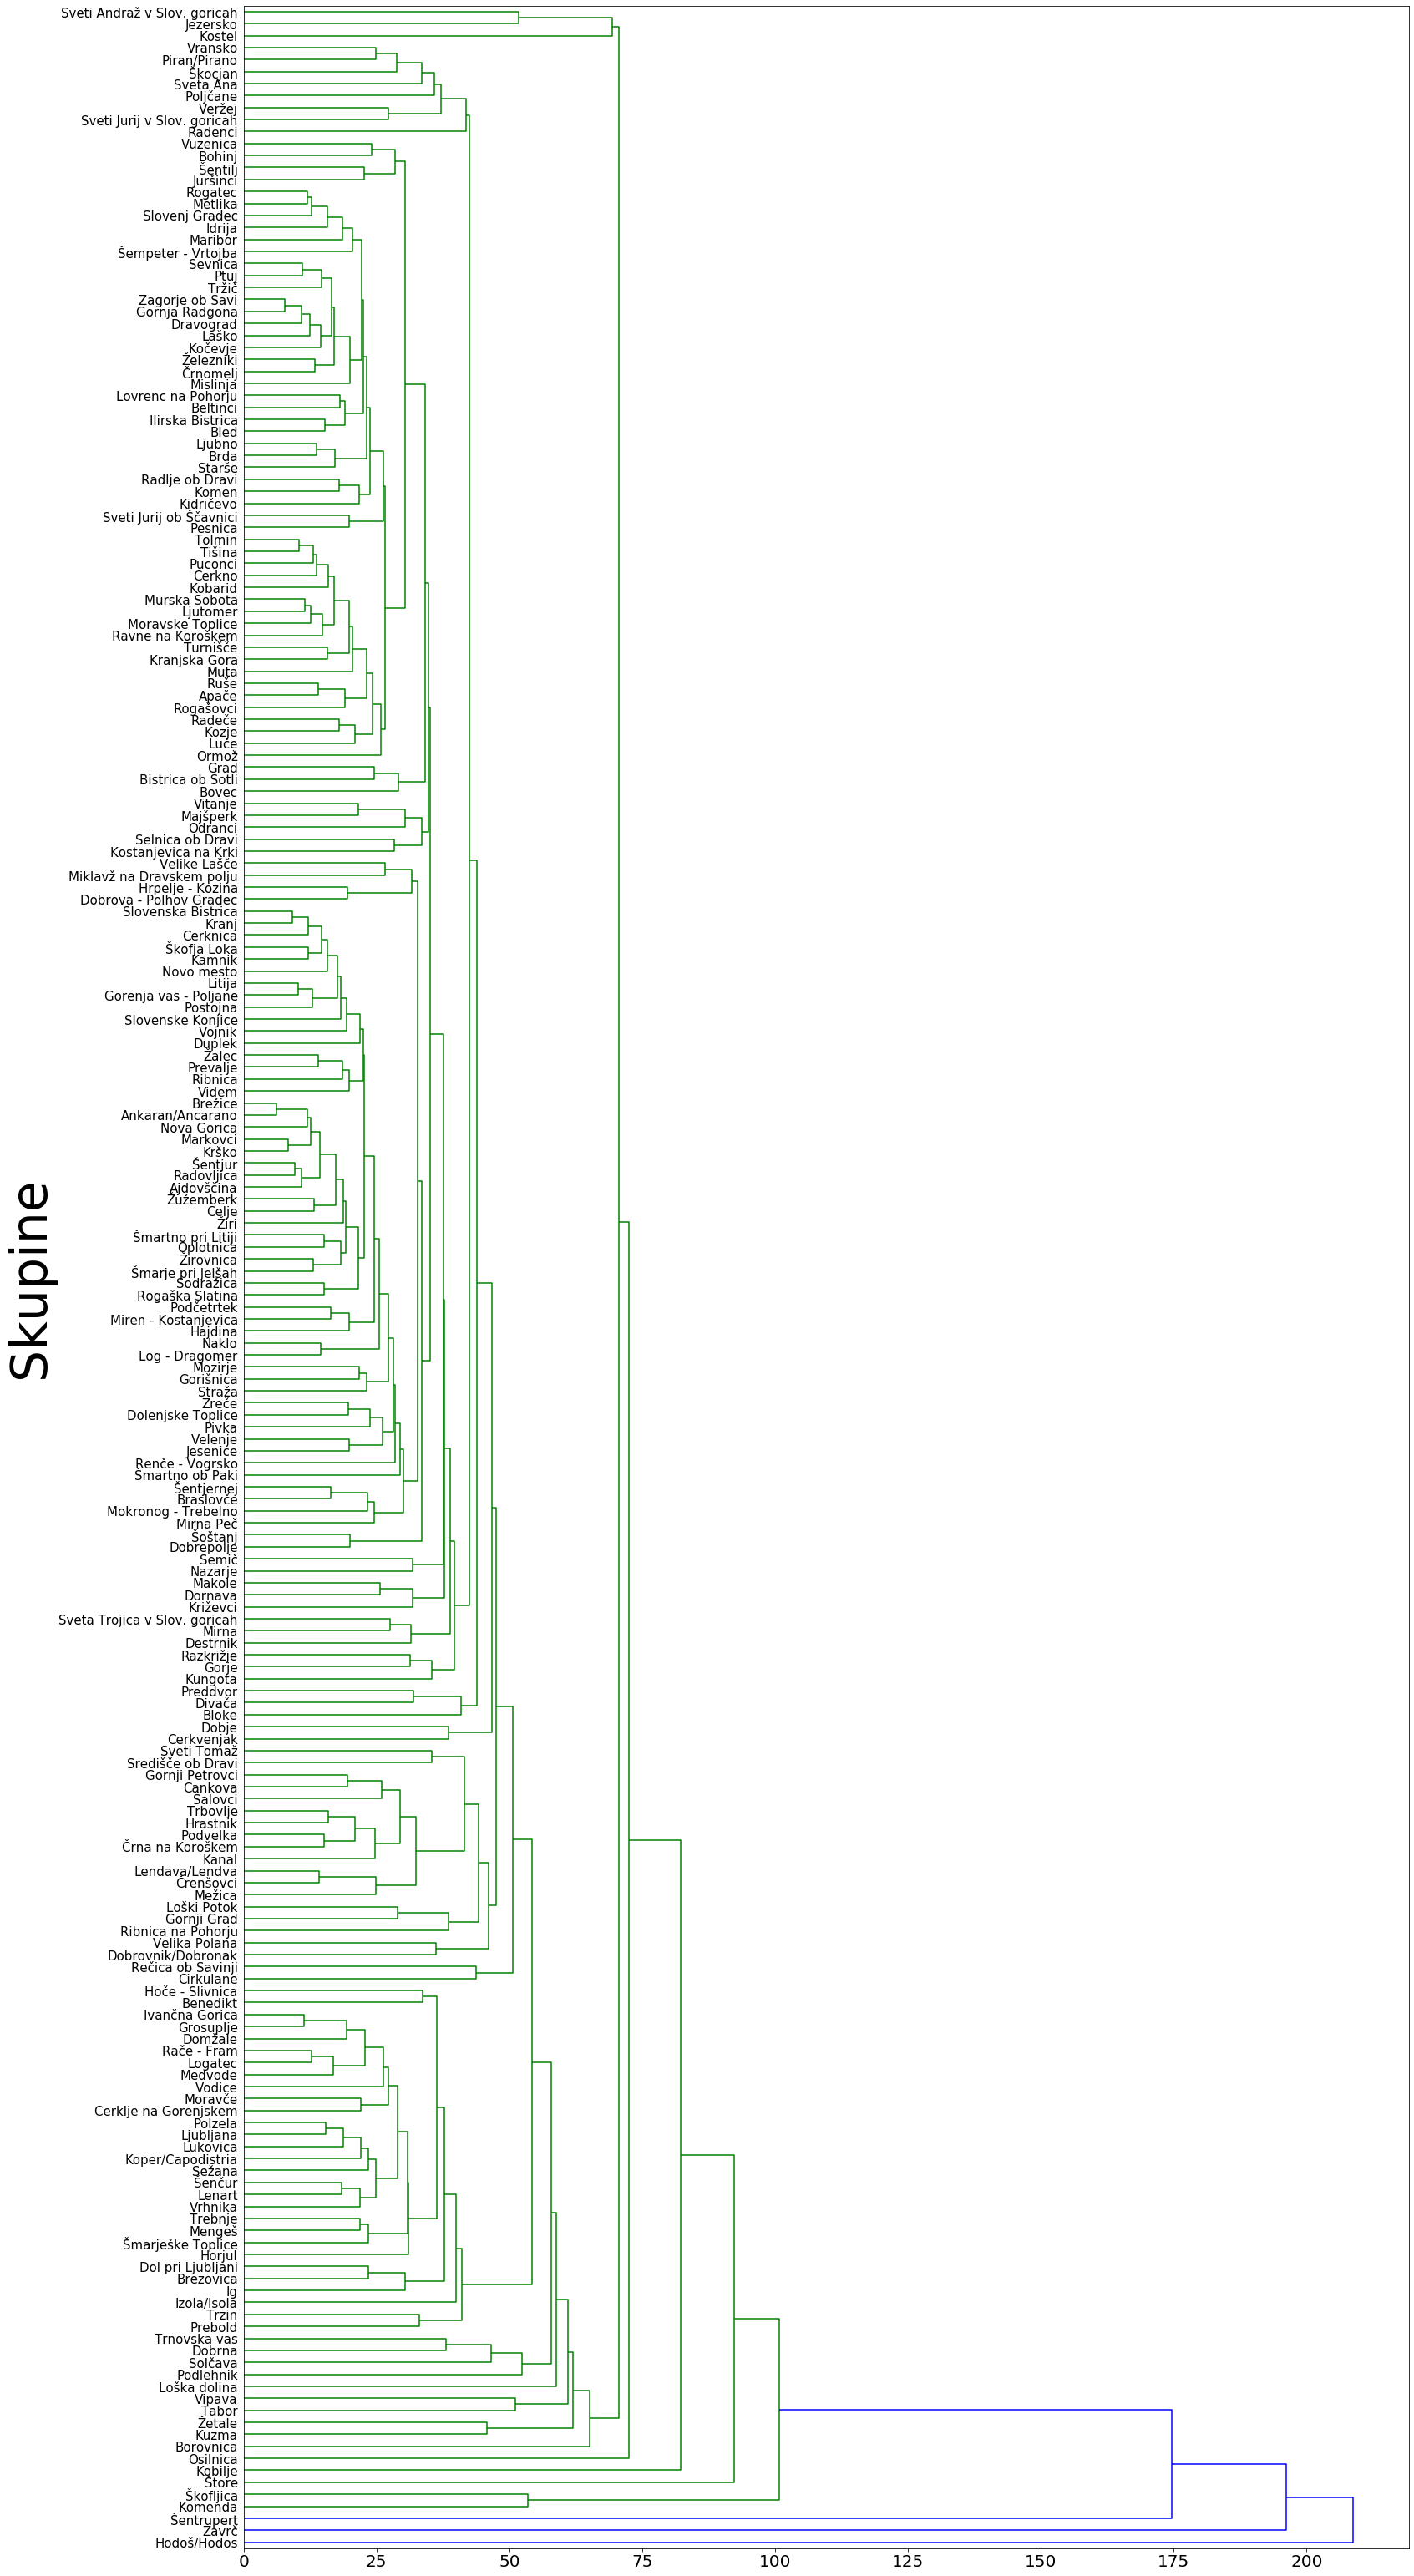

In [32]:
plt.figure(figsize=(25, 56))
D  = sch.dendrogram(Lll2,labels=obcine,orientation="right", leaf_font_size=15)

plt.ylabel("Skupine", fontsize=60)
plt.xticks(fontsize=20)
plt.show()

**Porazdelitve rasti, pri vseh se gleda samo občine in ne skupno Slovenije("obcina!="SLOVENIA"").**

In [11]:
lis=[]
lis2=[]
lis3=[]

reader = DictReader(open('../Data/prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    obcina=row["MUNICIPALITIES"]
    leto=row["2018 Total increase"]
    leto2=row["2007 Total increase per 1000 population"]
    leto3=row["2008 Total increase per 1000 population"]
    
    if obcina!="SLOVENIA":
        lis.append(float(leto))
        if leto2=="-":
            lis2.append(float(0))
        else:
            lis2.append(float(leto2))
        if leto3=="-":
            lis3.append(float(0))
        else:
            lis3.append(float(leto3))

In [12]:
lis.sort()
lis2.sort()
lis3.sort()

**Direktne številke rasti za leto 2018, čist desno je Ljubljana(veliko ljudi)**

Text(0, 0.5, 'Število občin')

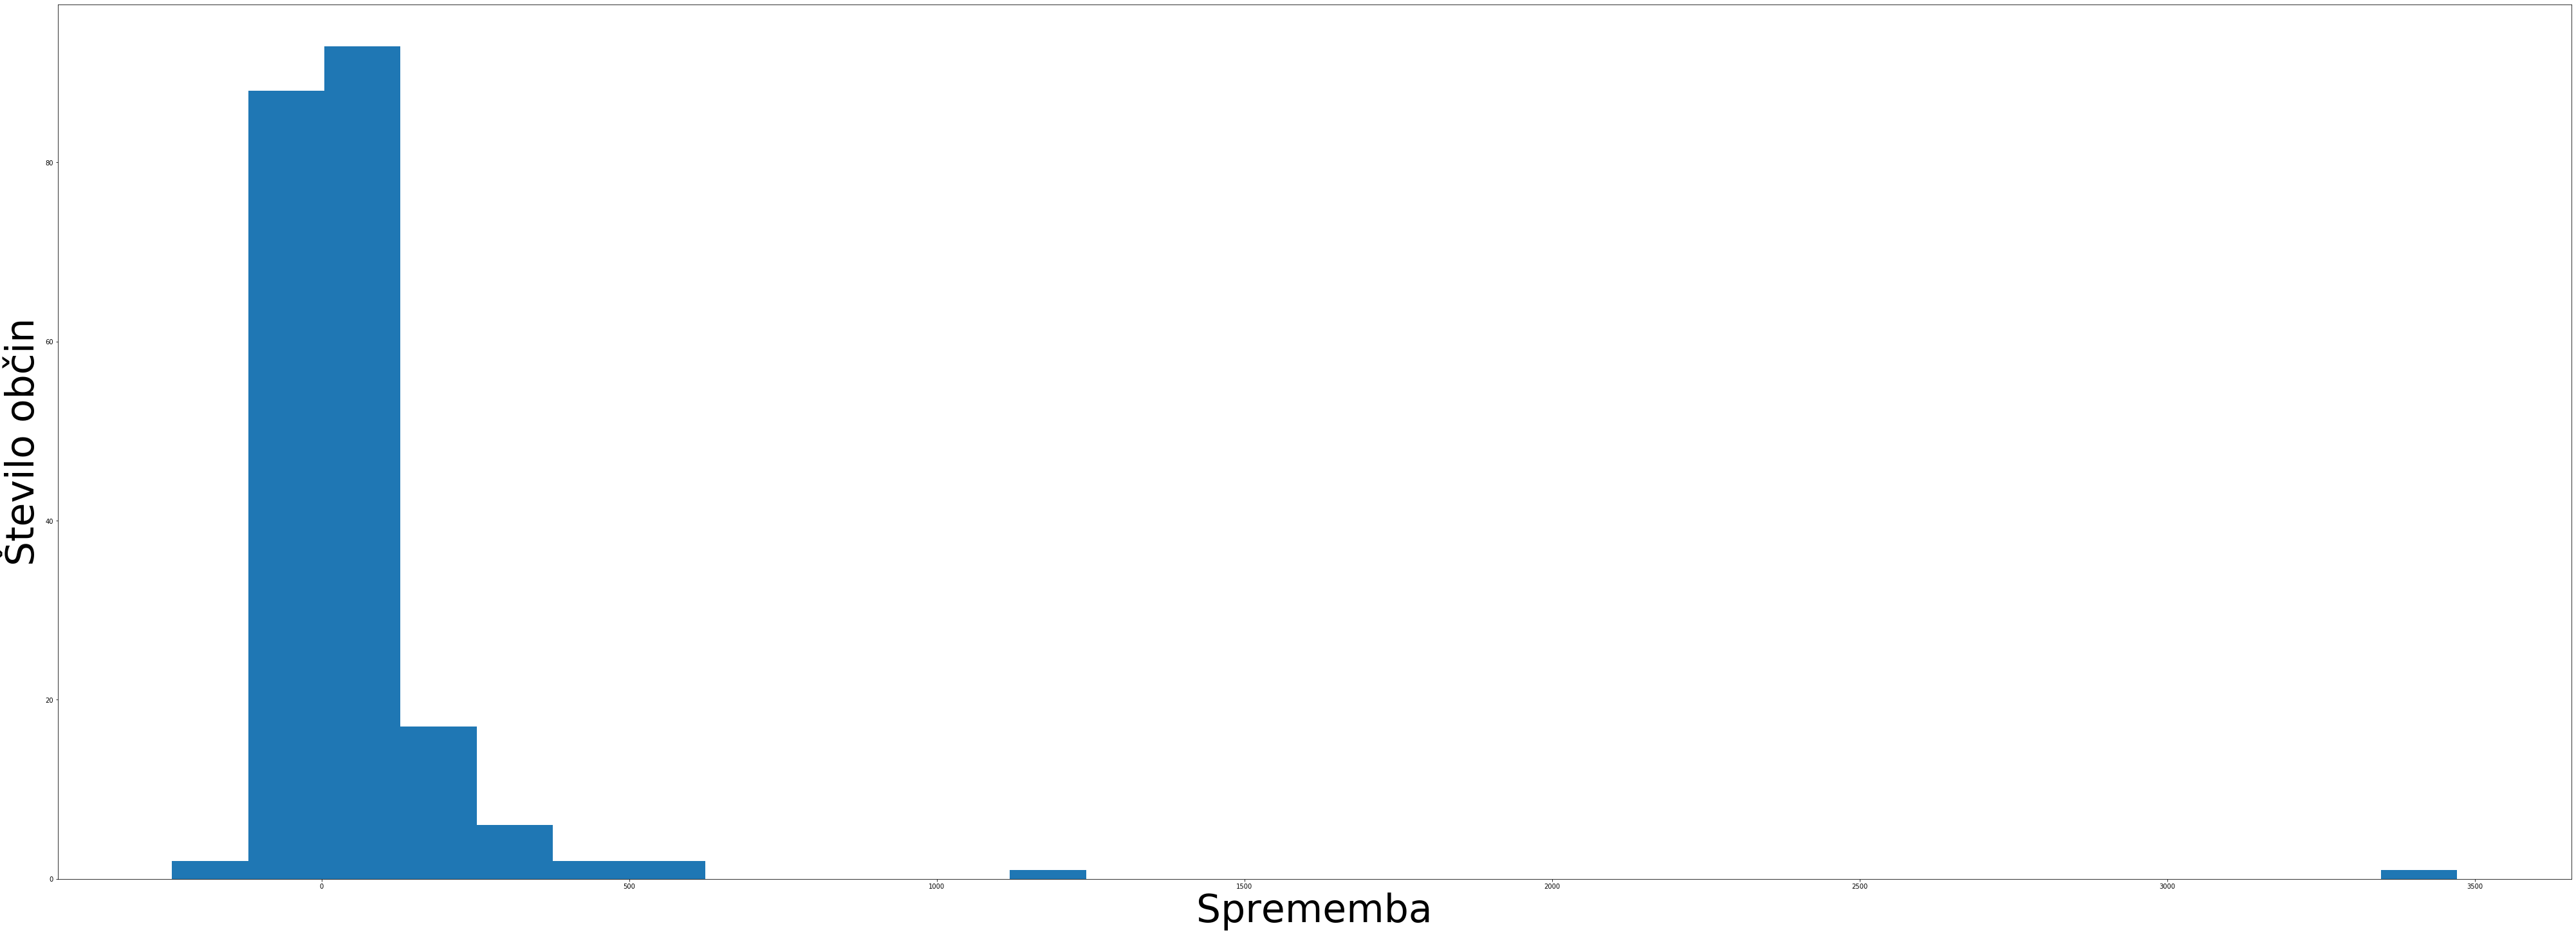

In [13]:
plt.figure(figsize=(70,25));
plt.hist(lis,bins=30)
plt.xlabel("Sprememba",fontsize=60)
plt.ylabel("Število občin",fontsize=60)

**Podatki za rast leta 2007 na 1000 prebivalstva**

Text(0, 0.5, 'Število občin')

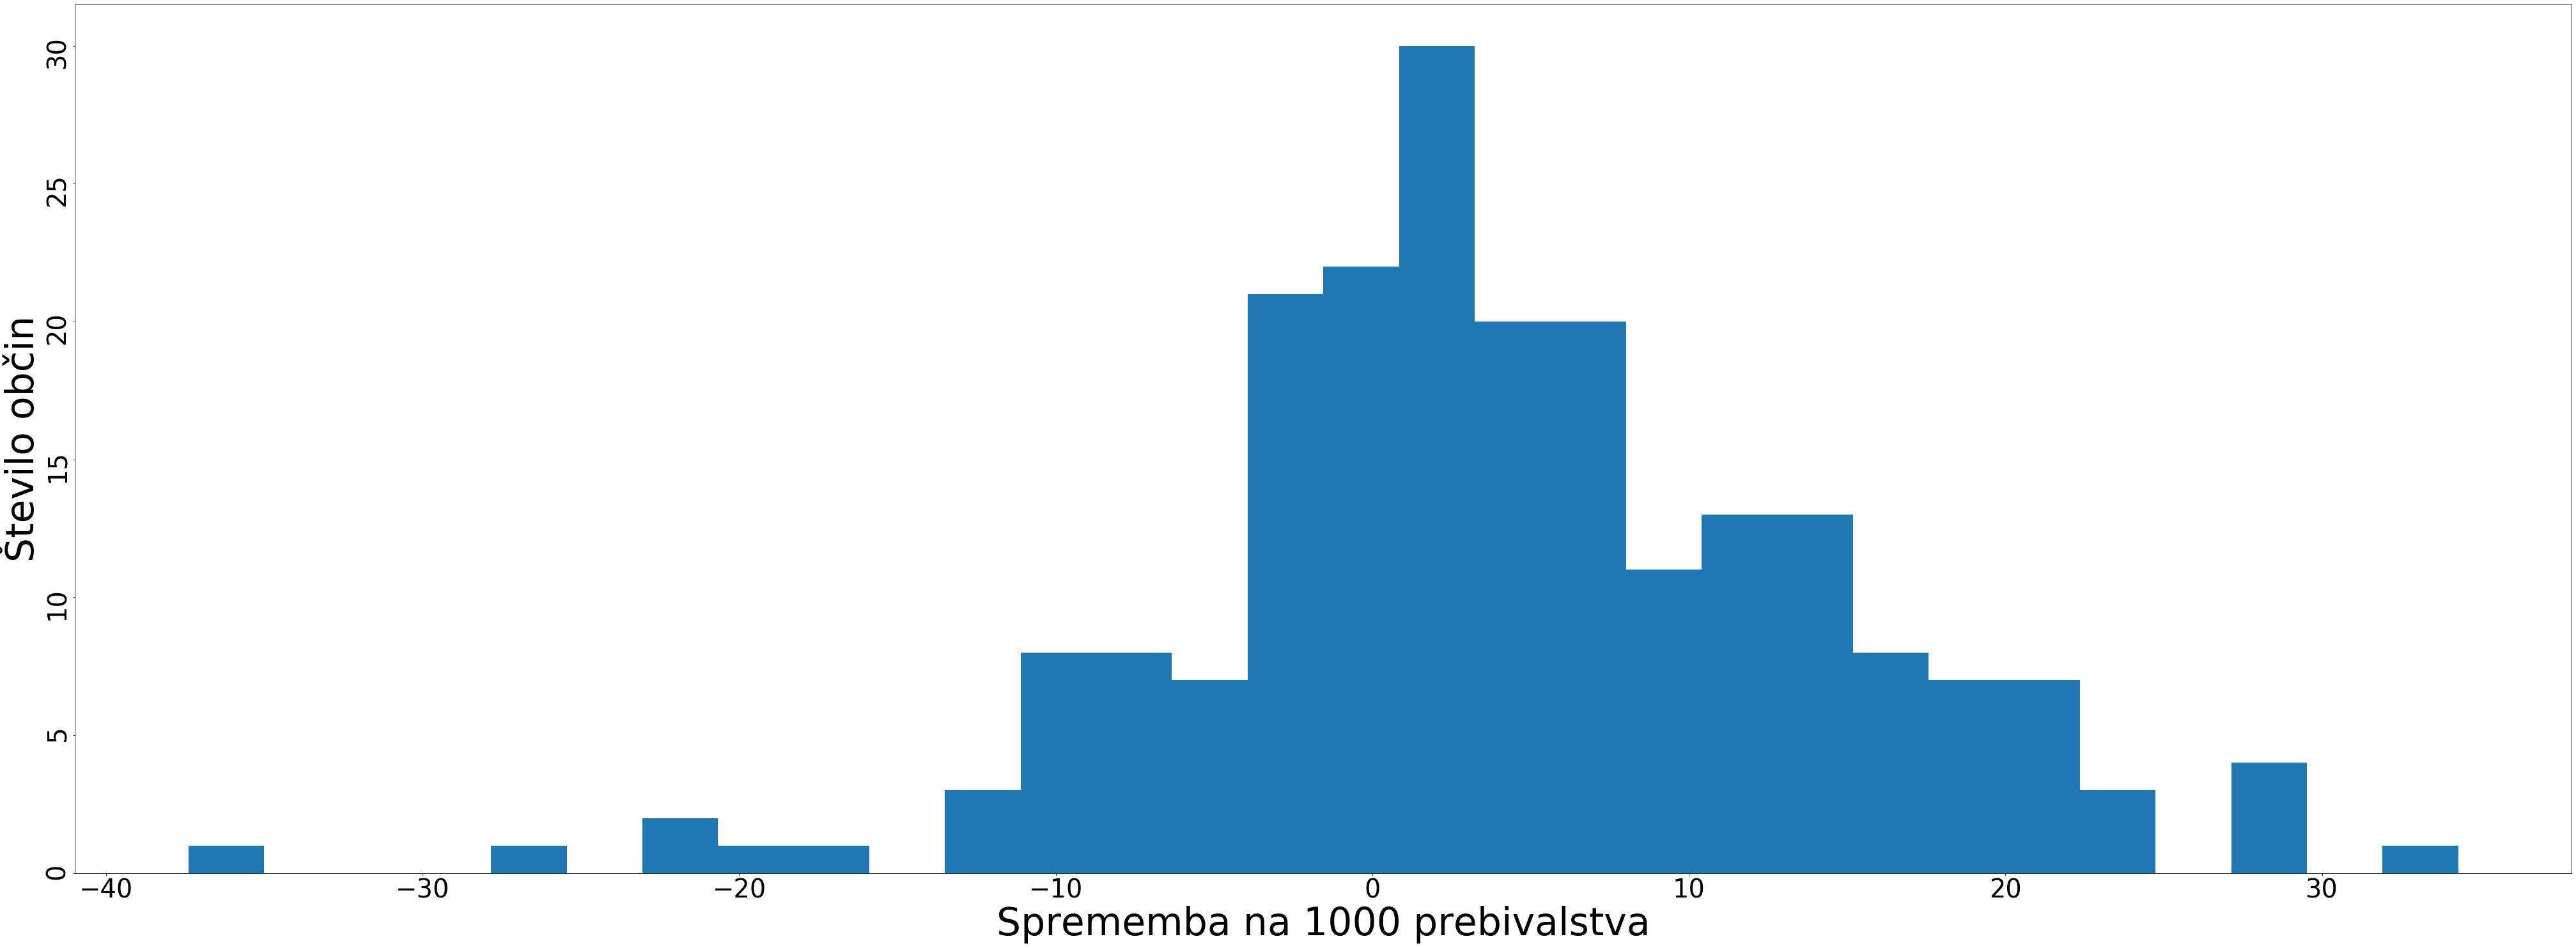

In [14]:
plt.figure(figsize=(70,25));
plt.hist(lis2,bins=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40, rotation=90)
plt.xlabel("Sprememba na 1000 prebivalstva",fontsize=60)
plt.ylabel("Število občin",fontsize=60)

**Primerjava rasti leta 2007 in 2008 na 1000 prebivasltva(podatki za 2007 so isti, kot zgornji graf).**

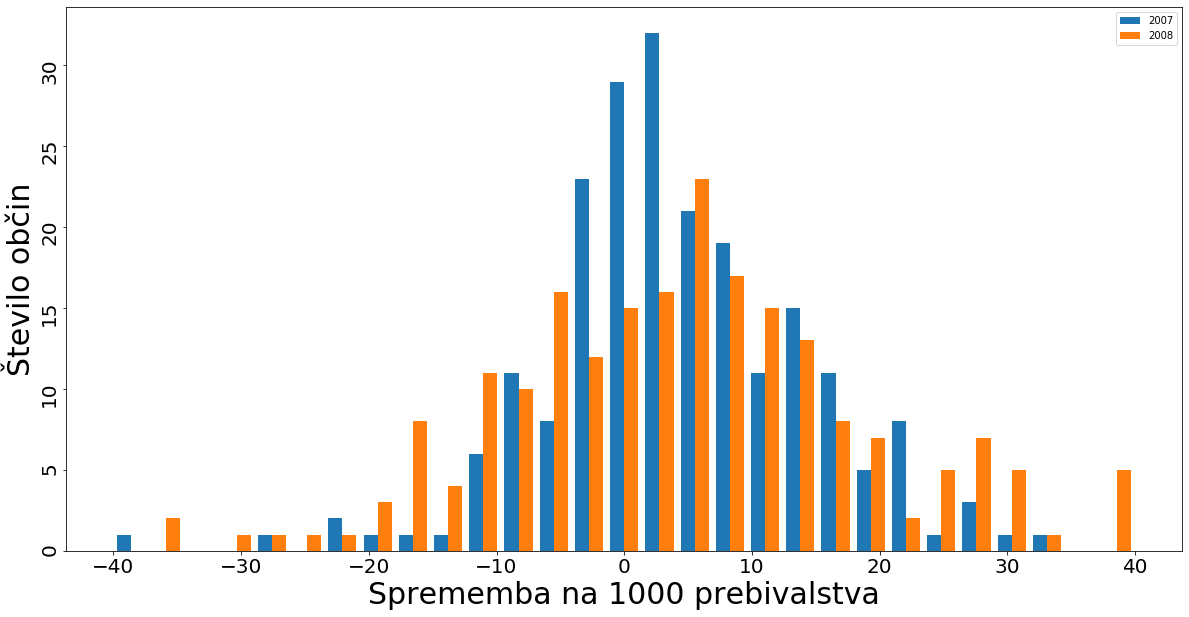

In [15]:
plt.figure(figsize=(20,10));

bins = np.linspace(-40, 40, 30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20, rotation=90)
plt.hist([lis2, lis3], bins, label=['2007', '2008'])
plt.legend(loc='upper right')
plt.xlabel("Sprememba na 1000 prebivalstva", fontsize=30)
plt.ylabel("Število občin",fontsize=30)
plt.show()

**Skor isto, kot zgoraj sam za druga leta stolpci(leto 2008 do 2018, ker ni podatkov za vsa leta)**

In [16]:
with open('../Data/prebivalstvo-SLO.csv', 'rt', encoding='utf-8') as f:
    d_reader = csv.DictReader(f)
    headers = d_reader.fieldnames

In [17]:
stolpci = []
for a in headers:
    if "Total increase" in a:
        stolpci.append(a)

In [18]:
stolpci2 = []
stolpci3 = []
for a in stolpci:
    if "Total increase per "not in a:
        leto = a.split()
        if float(leto[0]) >2007: 
            stolpci2.append(a)
            stolpci3.append(leto[0])

In [19]:
stolpci2

['2008 Total increase',
 '2009 Total increase',
 '2010 Total increase',
 '2011 Total increase',
 '2012 Total increase',
 '2013 Total increase',
 '2014 Total increase',
 '2015 Total increase',
 '2016 Total increase',
 '2017 Total increase',
 '2018 Total increase']

**Iskanje občine z največjo rastjo in upadom leta 2018, na 1000 prebivalstva**

In [20]:
slovar=defaultdict(float)
reader = DictReader(open('../Data/prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    obcina=row["MUNICIPALITIES"]
    vv=row["2018 Total increase per 1000 population"]
    if obcina!="SLOVENIA":
        slovar[obcina]=(float(vv))
      

In [21]:
max(slovar.values()),min(slovar.values())

(81.9, -151.5)

In [22]:
for a,b in slovar.items():
    if b==max(slovar.values()):
        print("max: ",a)
    if b==min(slovar.values()):
        print("min: ",a)

max:  Štore
min:  Zavrč


In [27]:
li=[]
vsi=[]
vsi2=[]

reader = DictReader(open('../Data/prebivalstvo-SLO.csv', 'rt', encoding='utf-8'))
for row in reader:
    li=[]
    obcina=row["MUNICIPALITIES"]
    obcine.append(obcina)
    if obcina =="Štore" :
        for a in stolpci2:
            if (row[a]=="-"):
                vsi.append(float(0))
            else:
                vsi.append(float(row[a]))
    if obcina =="Zavrč":
        for a in stolpci2:
            if (row[a]=="-"):
                vsi2.append(float(0))
            else:
                vsi2.append(float(row[a]))
    


In [24]:
vsi

[160.0, 47.0, -22.0, 36.0, -5.0, -43.0, 9.0, -20.0, 6.0, 15.0, 355.0]

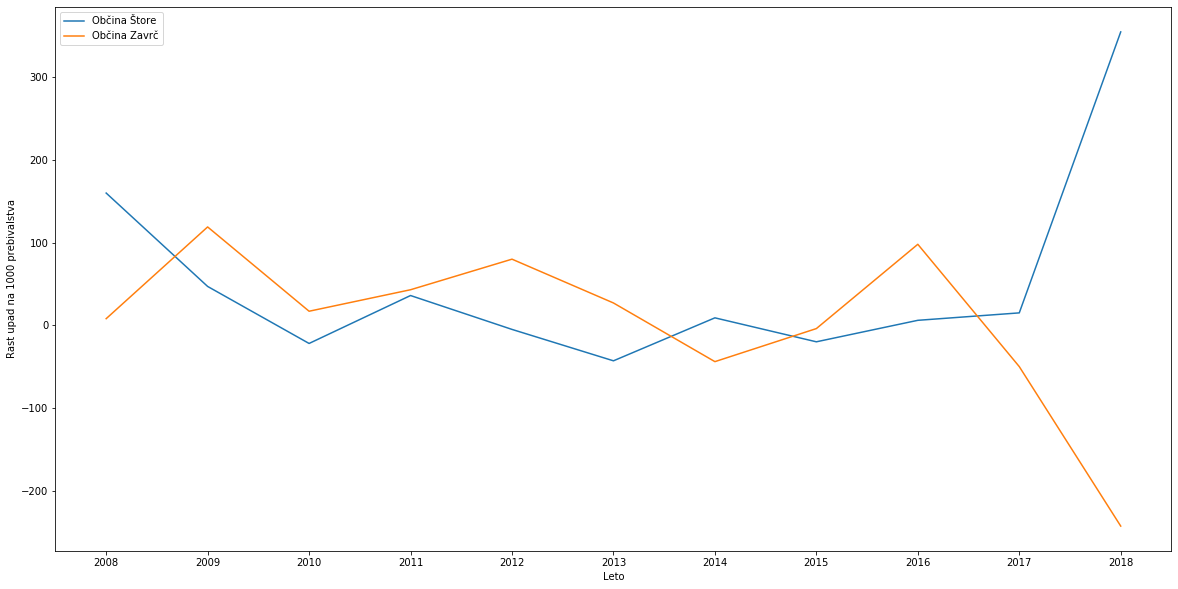

In [28]:
plt.figure(figsize=(20,10));
plt.plot(stolpci3,vsi, label="Občina Štore")
plt.plot(stolpci3,vsi2, label="Občina Zavrč")
plt.xlabel("Leto")
plt.ylabel("Rast upad na 1000 prebivalstva")
plt.legend()
plt.show()